# Data Preparation

In [410]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [411]:
#Load the dataset and store the date into a dataframe variable df
hd = pd.read_csv("G:\clevelanddataset.csv")

In [412]:
#Check number of rows and columns in a dataframe
hd.shape

(303, 14)

In [413]:
#Change the column names
hd.columns = ['Age', 'Sex','ChestpainType','RestingBP','Cholestrol','FastingBloodSugar','RestingECG','Thalach','Exang','Oldpeak','Slope','Ca','Thal','Target']

In [414]:
#print dataframe
hd

,Age,Sex,ChestpainType,RestingBP,Cholestrol,FastingBloodSugar,RestingECG,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [415]:
#Summary of the dataframe
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                303 non-null    int64  
 1   Sex                303 non-null    int64  
 2   ChestpainType      303 non-null    int64  
 3   RestingBP          303 non-null    int64  
 4   Cholestrol         303 non-null    int64  
 5   FastingBloodSugar  303 non-null    int64  
 6   RestingECG         303 non-null    int64  
 7   Thalach            303 non-null    int64  
 8   Exang              303 non-null    int64  
 9   Oldpeak            303 non-null    float64
 10  Slope              303 non-null    int64  
 11  Ca                 303 non-null    object 
 12  Thal               303 non-null    object 
 13  Target             303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


# Data Cleaning

In [416]:
#Return the number of unique values in the attributes of dataframe and compare the values from the Dataset Info
hd.nunique()

Age                   41
Sex                    2
ChestpainType          4
RestingBP             50
Cholestrol           152
FastingBloodSugar      2
RestingECG             3
Thalach               91
Exang                  2
Oldpeak               40
Slope                  3
Ca                     5
Thal                   4
Target                 5
dtype: int64

In [417]:
#Get the unique values of an attribute 'Ca'
hd['Ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [418]:
#Get the unique values of an attribute 'Thal'
hd['Thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [419]:
#load a CSV value with missing values and mark the bad value character with NaN missing values
#Assign column names to the data
hd1 = pd.read_csv("G:/clevelanddataset.csv",na_values=['?'], header = 0, names=['Age', 'Sex','ChestpainType','RestingBP','Cholestrol','FastingBloodSugar','RestingECG','Thalach','Exang','Oldpeak','Slope','Ca','Thal','Target'])                                                           

In [420]:
#Check number of missing values in a dataframe
hd1.isnull().sum()

Age                  0
Sex                  0
ChestpainType        0
RestingBP            0
Cholestrol           0
FastingBloodSugar    0
RestingECG           0
Thalach              0
Exang                0
Oldpeak              0
Slope                0
Ca                   4
Thal                 2
Target               0
dtype: int64

In [421]:
#Filter missing values in to a dataframe
missing = hd1[hd1.isnull().any(axis=1)]

In [422]:
missing

,Age,Sex,ChestpainType,RestingBP,Cholestrol,FastingBloodSugar,RestingECG,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,2
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [423]:
#Replace 2,3,4 values with 1 as the (1,2,3,4) values of target attribute predict the presence of heart disease
hd1['Target'] = hd['Target'].replace([2,3,4],1)

In [424]:
#Values have been replaced by 1 = presence of disease
hd1

,Age,Sex,ChestpainType,RestingBP,Cholestrol,FastingBloodSugar,RestingECG,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [425]:
#Get range of 'Ca' counts in attribute
hd1['Ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: Ca, dtype: int64

In [426]:
#Fill the missing values with the maximum occuring value normal reading for CA=0-3,we are replacing ca with respectively values
hd1['Ca'].fillna(hd1['Ca'].value_counts().index[0], inplace = True)

In [427]:
#Missing value filled with maximum occuring value
hd1['Ca'].value_counts()

0.0    180
1.0     65
2.0     38
3.0     20
Name: Ca, dtype: int64

In [428]:
#Get maximum value counts in attribute
hd1['Thal'].value_counts()

3.0    166
7.0    117
6.0     18
Name: Thal, dtype: int64

In [429]:
#Fill the missing values with the maximum occuring value
hd1['Thal'].fillna(hd1['Thal'].value_counts().index[0], inplace = True)

In [430]:
#Missing value filled with maximum occuring value
hd1['Thal'].value_counts()

3.0    168
7.0    117
6.0     18
Name: Thal, dtype: int64

In [431]:
#Check number of missing values in a dataframe
hd1.isnull().sum()

Age                  0
Sex                  0
ChestpainType        0
RestingBP            0
Cholestrol           0
FastingBloodSugar    0
RestingECG           0
Thalach              0
Exang                0
Oldpeak              0
Slope                0
Ca                   0
Thal                 0
Target               0
dtype: int64

In [432]:
#Check number of unique values in the attribute
hd1['Target'].unique()

array([0, 1], dtype=int64)

In [433]:
#display top 6 rows
hd1.head(6)

,Age,Sex,ChestpainType,RestingBP,Cholestrol,FastingBloodSugar,RestingECG,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [434]:
#Check feature information
hd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                303 non-null    int64  
 1   Sex                303 non-null    int64  
 2   ChestpainType      303 non-null    int64  
 3   RestingBP          303 non-null    int64  
 4   Cholestrol         303 non-null    int64  
 5   FastingBloodSugar  303 non-null    int64  
 6   RestingECG         303 non-null    int64  
 7   Thalach            303 non-null    int64  
 8   Exang              303 non-null    int64  
 9   Oldpeak            303 non-null    float64
 10  Slope              303 non-null    int64  
 11  Ca                 303 non-null    float64
 12  Thal               303 non-null    float64
 13  Target             303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [435]:
# convert 'float64' into 'int64' type
hd1['Ca'] = hd1['Ca'].astype('int')

In [436]:
# convert 'float64' into 'int64' type
hd1['Thal'] = hd1['Thal'].astype('int')

In [437]:
#Converted datatypes
hd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                303 non-null    int64  
 1   Sex                303 non-null    int64  
 2   ChestpainType      303 non-null    int64  
 3   RestingBP          303 non-null    int64  
 4   Cholestrol         303 non-null    int64  
 5   FastingBloodSugar  303 non-null    int64  
 6   RestingECG         303 non-null    int64  
 7   Thalach            303 non-null    int64  
 8   Exang              303 non-null    int64  
 9   Oldpeak            303 non-null    float64
 10  Slope              303 non-null    int64  
 11  Ca                 303 non-null    int32  
 12  Thal               303 non-null    int32  
 13  Target             303 non-null    int64  
dtypes: float64(1), int32(2), int64(11)
memory usage: 30.9 KB


In [438]:
#Check for duplicates
hd1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

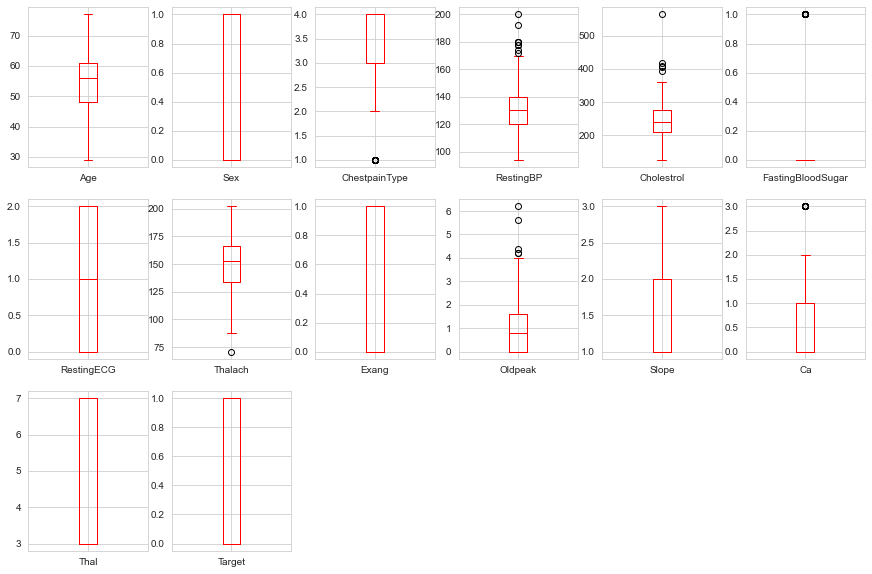

In [439]:
#plot a box plot to check outliers
hd1.plot(kind='box', subplots=True, layout=(3,6), sharex=False, sharey=False, figsize=(15, 10), color='red');

In [440]:
#remove outliers for RestingBP using IQR method
Q3 = hd1.RestingBP.quantile(.75)
Q1 = hd1.RestingBP.quantile(.25)
IQR = Q3 - Q1
hd1 = hd1[~((hd1.RestingBP < Q1 - 1.5*IQR) | (hd1.RestingBP > Q3 + 1.5*IQR))]

In [441]:
#remove outliers for Cholestrol using IQR method
Q3 = hd1.Cholestrol.quantile(.75)
Q1 = hd1.Cholestrol.quantile(.25)
IQR = Q3 - Q1
hd1 = hd1[~((hd1.Cholestrol < Q1 - 1.5*IQR) | (hd1.Cholestrol > Q3 + 1.5*IQR))]


In [442]:
#remove outliers for Oldpeak using IQR method
Q3 = hd1.Oldpeak.quantile(.75)
Q1 = hd1.Oldpeak.quantile(.25)
IQR = Q3 - Q1
hd1 = hd1[~((hd1.Oldpeak < Q1 - 1.5*IQR) | (hd1.Oldpeak > Q3 + 1.5*IQR))]

In [443]:
#Statistics Summary
hd1.describe()

,Age,Sex,ChestpainType,RestingBP,Cholestrol,FastingBloodSugar,RestingECG,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,54.115789,0.698246,3.136842,129.947368,242.515789,0.140351,0.975439,149.722807,0.315789,0.948772,1.571930,0.635088,4.652632,0.445614
std,9.134977,0.459827,0.963531,15.435031,44.652539,0.347962,0.997935,23.099989,0.465647,1.024338,0.598635,0.903922,1.927023,0.497908
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,239.000000,0.000000,0.000000,153.000000,0.000000,0.600000,2.000000,0.000000,3.000000,0.000000
75%,60.000000,1.000000,4.000000,140.000000,271.000000,0.000000,2.000000,168.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,3.000000,3.000000,7.000000,1.000000


# Exploring continuous features

In [444]:
#Copy hd1 dataframe to cont to explore continuous features
cont=hd1.copy()

In [445]:
cont

,Age,Sex,ChestpainType,RestingBP,Cholestrol,FastingBloodSugar,RestingECG,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [446]:
# Drop all categorical features
cat_feat = ['Sex','ChestpainType','FastingBloodSugar', 'RestingECG', 'Exang', 'Slope', 'Ca', 'Thal']
cont.drop(cat_feat, axis=1, inplace=True)
cont.head()

,Age,RestingBP,Cholestrol,Thalach,Oldpeak,Target
0,63,145,233,150,2.3,0
1,67,160,286,108,1.5,1
2,67,120,229,129,2.6,1
3,37,130,250,187,3.5,0
4,41,130,204,172,1.4,0


In [447]:
cont.describe()

,Age,RestingBP,Cholestrol,Thalach,Oldpeak,Target
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,54.115789,129.947368,242.515789,149.722807,0.948772,0.445614
std,9.134977,15.435031,44.652539,23.099989,1.024338,0.497908
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.000000,120.000000,211.000000,133.000000,0.000000,0.000000
50%,55.000000,130.000000,239.000000,153.000000,0.600000,0.000000
75%,60.000000,140.000000,271.000000,168.000000,1.600000,1.000000
max,77.000000,170.000000,360.000000,202.000000,4.000000,1.000000


In [448]:
cont.groupby('Target').mean()

,Age,RestingBP,Cholestrol,Thalach,Oldpeak
Target,,,,,
0,52.246835,128.303797,238.126582,158.474684,0.556329
1,56.440945,131.992126,247.976378,138.834646,1.437008


In [449]:
cont.groupby(cont['Age'].isnull()).mean()

,Age,RestingBP,Cholestrol,Thalach,Oldpeak,Target
Age,,,,,,
False,54.115789,129.947368,242.515789,149.722807,0.948772,0.445614


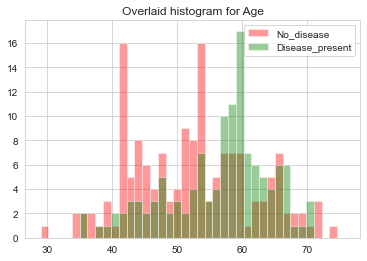

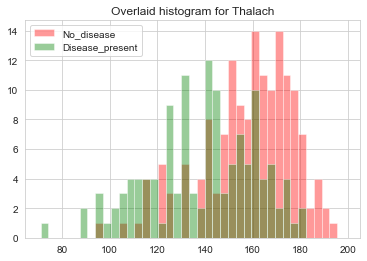

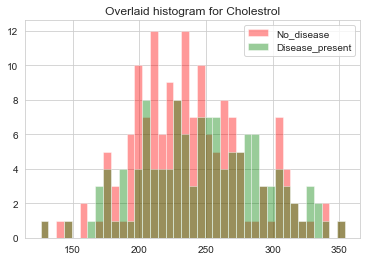

In [450]:
for i in ['Age','Thalach', 'Cholestrol']:
    No_disease = list(cont[cont['Target'] == 0][i].dropna())
    Disease_present = list(cont[cont['Target'] == 1][i].dropna())
    xmin = min(min(No_disease), min(Disease_present))
    xmax = max(max(No_disease), max(Disease_present))
    width = (xmax - xmin) / 40
    sns.distplot(No_disease, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(Disease_present, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['No_disease', 'Disease_present'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

<Figure size 432x288 with 0 Axes>

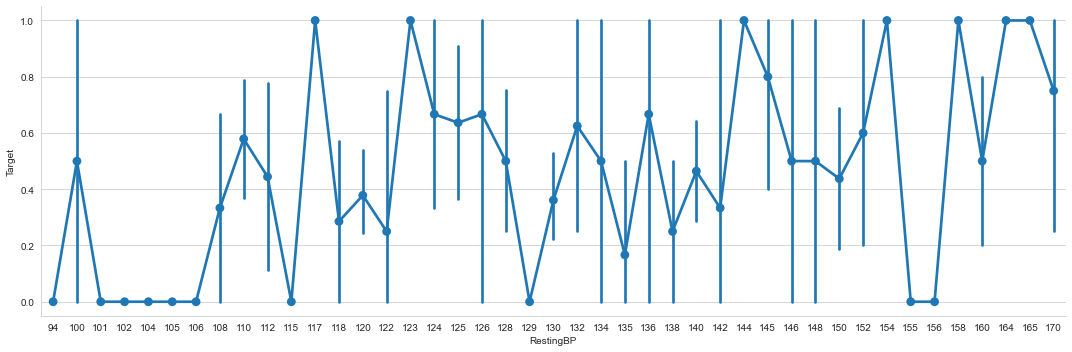

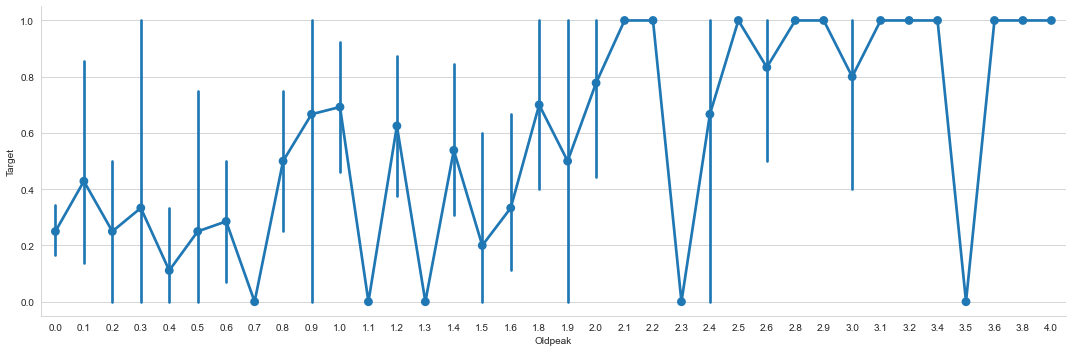

In [451]:
for i, col in enumerate(['RestingBP','Oldpeak']):
    plt.figure(i)
    sns.catplot(x=col, y='Target', data=cont, kind='point', aspect=3)

# Exploring Categorical Features

In [452]:
#Copy hd1 dataframe to cont to explore categorical features
cat=hd1.copy()

In [453]:
#Replace categorical variables for better representation
cat['Sex'] = cat.Sex.replace({1: "Male", 0: "Female"})


In [454]:
# Drop all continuous features
cont_feat = ['Age', 'ChestpainType', 'RestingBP', 'Cholestrol','Thalach' , 'Oldpeak']
cat.drop(cont_feat, axis=1, inplace=True)
cat.head()

,Sex,FastingBloodSugar,RestingECG,Exang,Slope,Ca,Thal,Target
0,Male,1,2,0,3,0,6,0
1,Male,0,2,1,2,3,3,1
2,Male,0,2,1,2,2,7,1
3,Male,0,0,0,3,0,3,0
4,Female,0,2,0,1,0,3,0


In [455]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 302
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sex                285 non-null    object
 1   FastingBloodSugar  285 non-null    int64 
 2   RestingECG         285 non-null    int64 
 3   Exang              285 non-null    int64 
 4   Slope              285 non-null    int64 
 5   Ca                 285 non-null    int32 
 6   Thal               285 non-null    int32 
 7   Target             285 non-null    int64 
dtypes: int32(2), int64(5), object(1)
memory usage: 17.8+ KB


In [456]:
cat.groupby('Target').mean()

,FastingBloodSugar,RestingECG,Exang,Slope,Ca,Thal
Target,,,,,,
0,0.132911,0.816456,0.139241,1.398734,0.272152,3.746835
1,0.149606,1.173228,0.535433,1.787402,1.086614,5.779528


<Figure size 432x288 with 0 Axes>

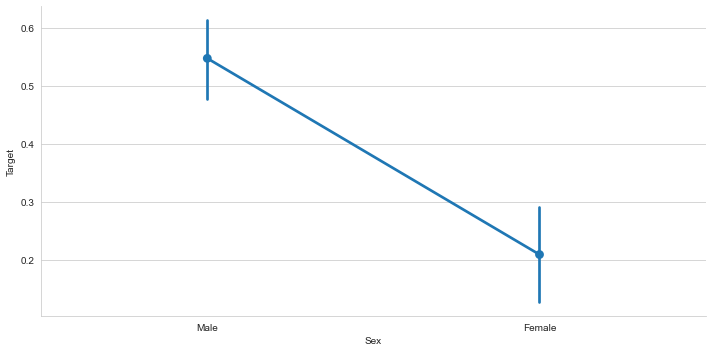

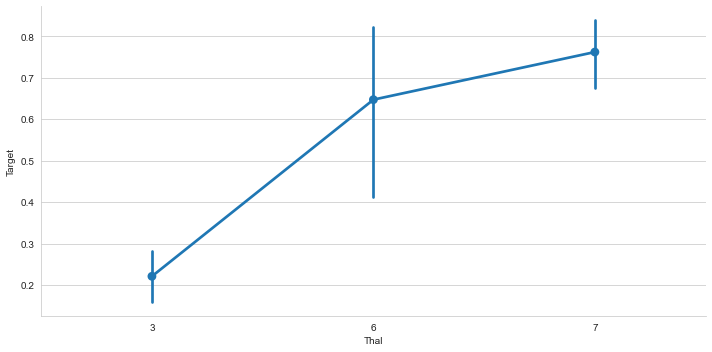

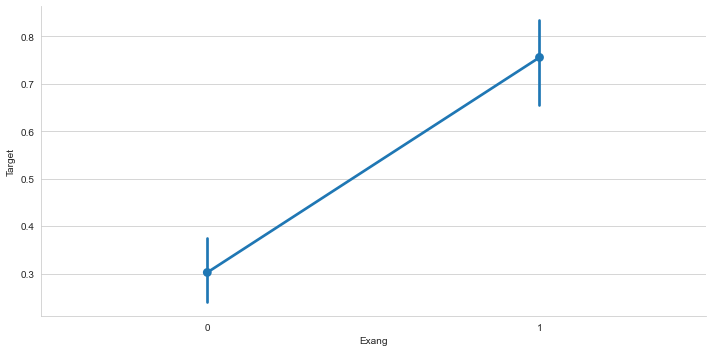

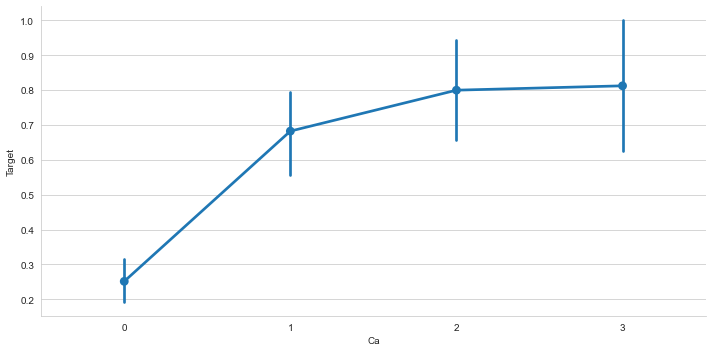

In [457]:
#Plot categorical features
for i, col in enumerate(['Sex', 'Thal', 'Exang', 'Ca']):
    plt.figure(i)
    sns.catplot(x=col, y='Target', data=cat, kind='point', aspect=2, )

In [458]:
cat.pivot_table('Target', index='Sex',columns='Exang', aggfunc='count')

Exang,0,1
Sex,,
Female,70,16
Male,125,74


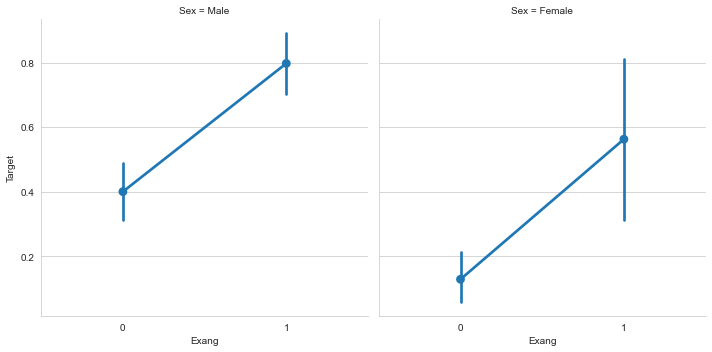

In [459]:
sns.catplot(x='Exang',y='Target',kind='point',data=cat,col='Sex')
pass

In [460]:
cat.pivot_table('Target', index='Sex',columns='Ca', aggfunc='count')

Ca,0,1,2,3
Sex,,,,
Female,60,14,10,2
Male,111,49,25,14


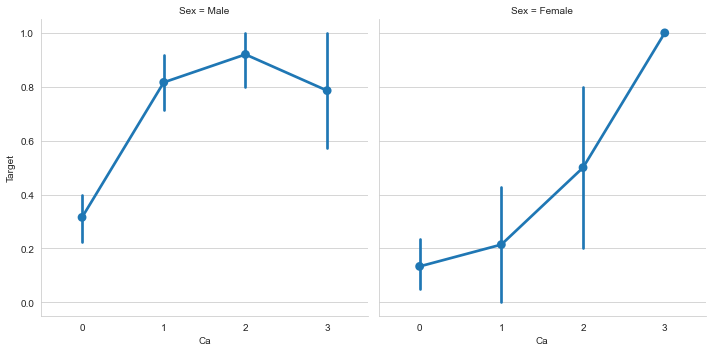

In [461]:
sns.catplot(x='Ca',y='Target',kind='point',data=cat,col='Sex')
pass

In [462]:
cat.pivot_table('Target', index='Sex',columns='Thal', aggfunc='count')

Thal,3,6,7
Sex,,,
Female,76,1,9
Male,87,16,96


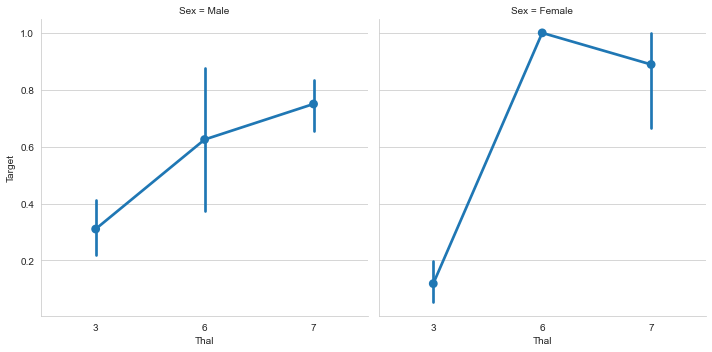

In [463]:
sns.catplot(x='Thal',y='Target',kind='point',data=cat,col='Sex')
pass

# Data Visualization

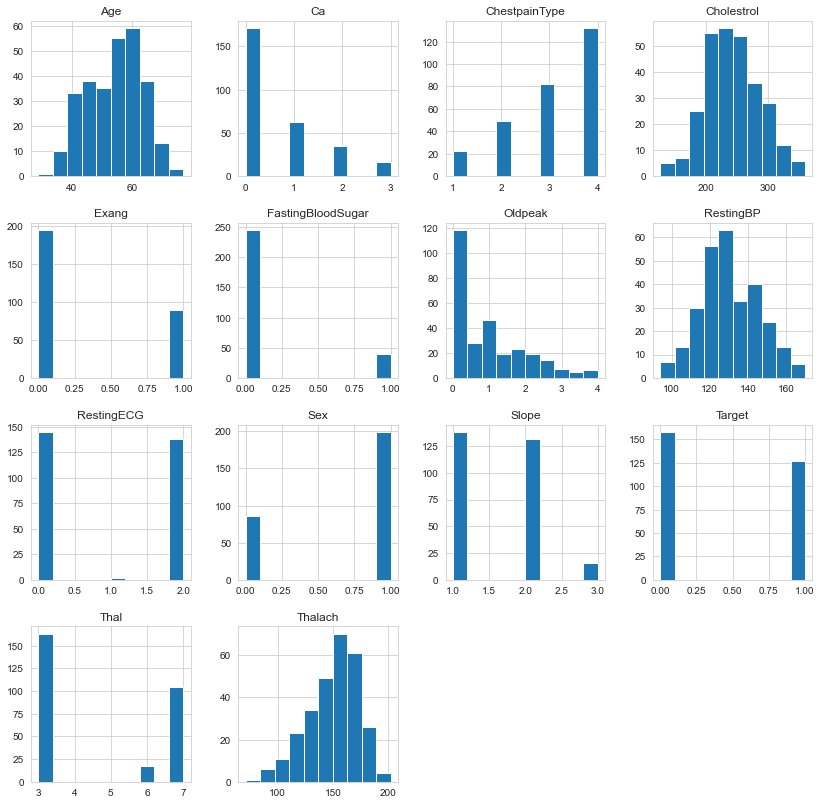

In [464]:
hd1.hist(figsize = (14,14))
plt.show()

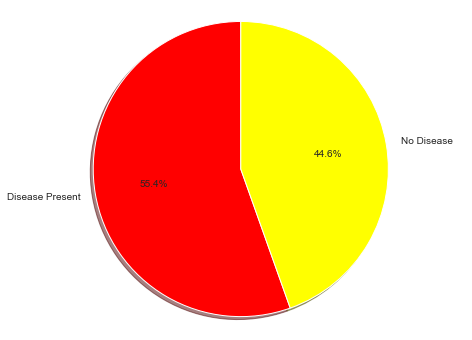

In [465]:
#Visualize the count of number of patients with absence or presence of stages of heart disease

#Create data for the graph
NoDisease = len(hd1[hd1.Target == 0])
Presence = len(hd1[hd1.Target == 1])
plt.figure(figsize=(8,6))
#Data to plot
labels = 'Disease Present','No Disease'
sizes = [NoDisease,Presence]
colors = ['Red', 'yellow']
explode = (0, 0)  # explode 1st slice
#Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

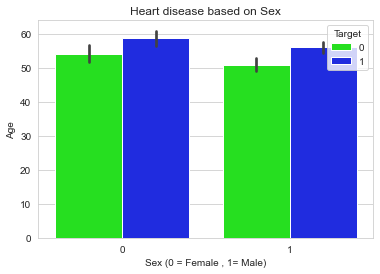

In [466]:
#visualize the count of number of patients with absence or presence of stages of heart disease
#Count plot on two categorical variables
sns.barplot(x='Sex',y ='Age',hue ='Target',data=hd1, palette = "hsv")
plt.title('Heart disease based on Sex')
plt.xlabel("Sex (0 = Female , 1= Male)")
plt.show()

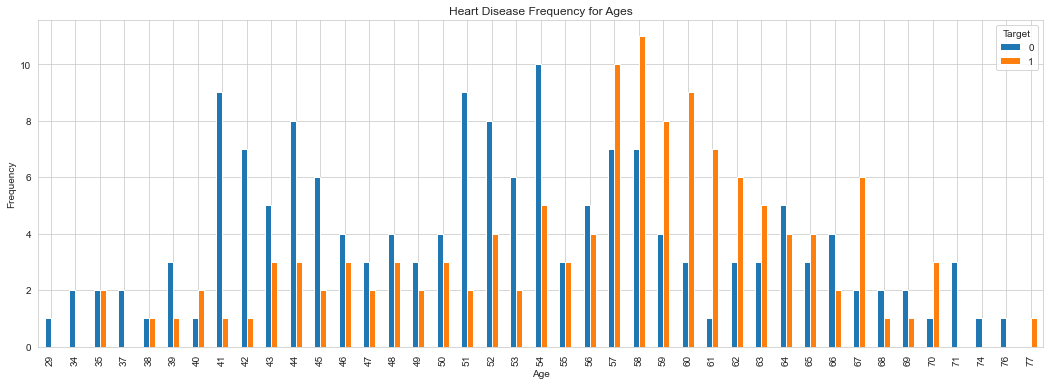

In [467]:
#crosstab function to plot at what age range frequency does a person get heart disease
pd.crosstab(hd1.Age,hd1.Target).plot(kind="bar",figsize=(18,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('HeartDiseaseAgevsTarget.png')
plt.show()

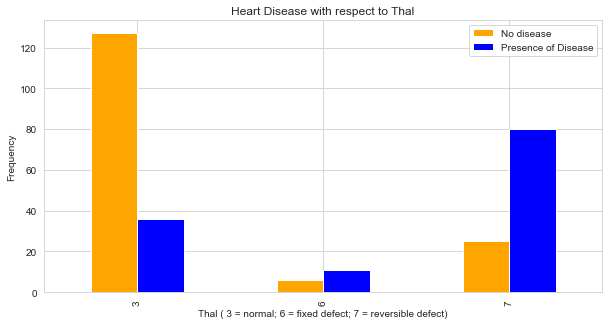

In [468]:
#Heart Disease with respect to Thal
pd.crosstab(hd1.Thal,hd1.Target).plot(kind="bar",figsize=(10,5),color=['orange','blue'])
plt.title('Heart Disease with respect to Thal')
plt.xlabel('Thal ( 3 = normal; 6 = fixed defect; 7 = reversible defect)')
plt.legend(["No disease", "Presence of Disease"])
plt.ylabel('Frequency')
plt.show()

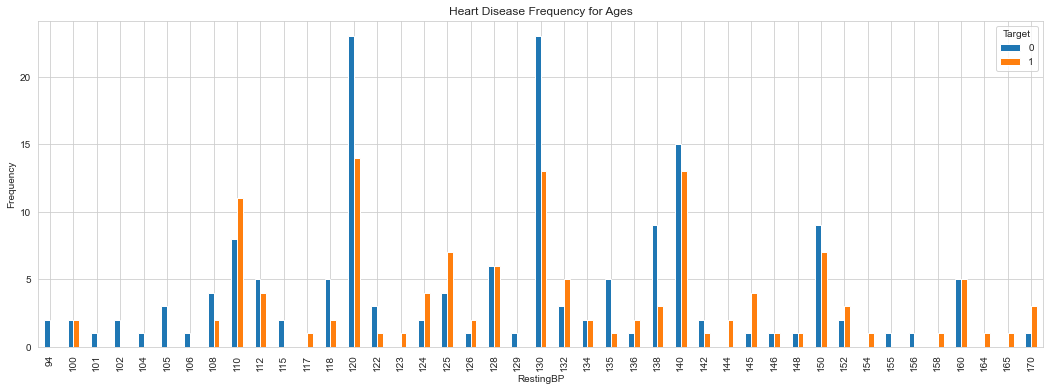

In [469]:
#Heart Disease with respect to RestingBP
pd.crosstab(hd1.RestingBP,hd1.Target).plot(kind="bar",figsize=(18,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('RestingBP')
plt.ylabel('Frequency')
plt.savefig('HeartDiseaseRestingBPvsTarget.png')
plt.show()

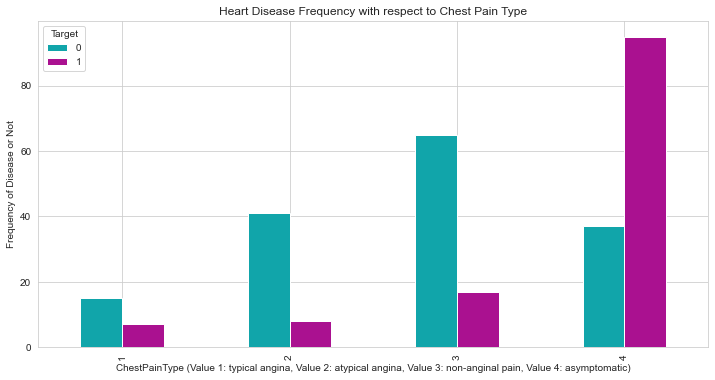

In [470]:
#Heart Disease with respect to ChestpainType
pd.crosstab(hd1.ChestpainType,hd1.Target).plot(kind="bar",figsize=(12,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency with respect to Chest Pain Type')
plt.xlabel('ChestPainType (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)')
plt.ylabel('Frequency of Disease or Not')
plt.show()

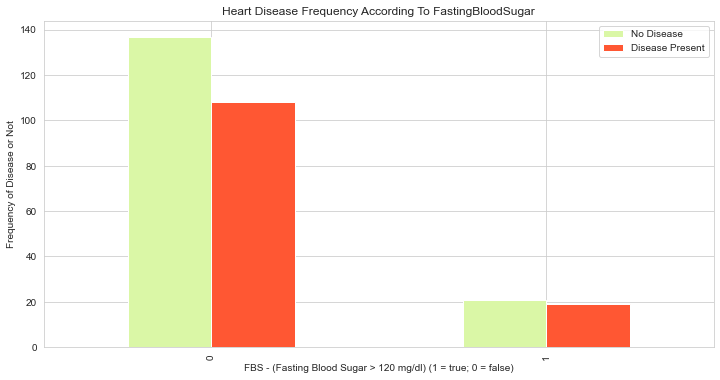

In [471]:
#Heart Disease with respect to FastingBloodSugar
pd.crosstab(hd1.FastingBloodSugar,hd1.Target).plot(kind="bar",figsize=(12,6),color=['#DAF7A6','#FF5733'])
plt.title('Heart Disease Frequency According To FastingBloodSugar')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.legend(["No Disease", "Disease Present"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

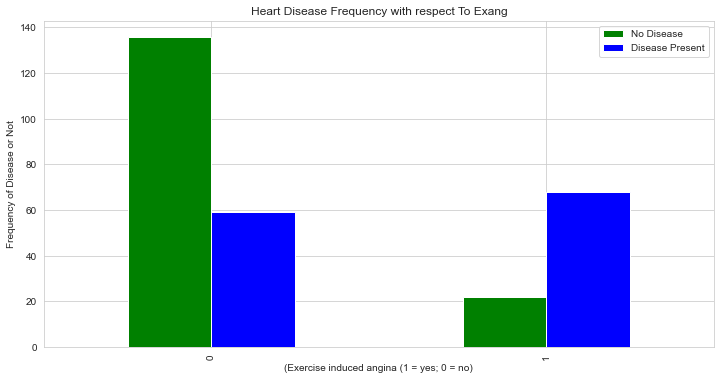

In [472]:
#Heart Disease with respect to Exang
pd.crosstab(hd1.Exang,hd1.Target).plot(kind="bar",figsize=(12,6),color=['green','blue' ])
plt.title('Heart Disease Frequency with respect To Exang')
plt.xlabel('(Exercise induced angina (1 = yes; 0 = no)')
plt.legend(["No Disease", "Disease Present"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

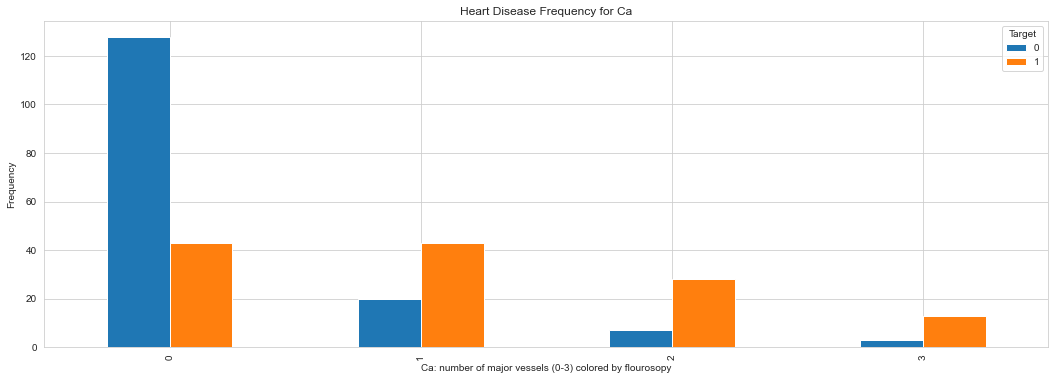

In [473]:
#crosstab function to plot at what Ca range frequency does a person get heart disease
pd.crosstab(hd1.Ca,hd1.Target).plot(kind="bar",figsize=(18,6))
plt.title('Heart Disease Frequency for Ca')
plt.xlabel('Ca: number of major vessels (0-3) colored by flourosopy')
plt.ylabel('Frequency')
plt.savefig('HeartDiseaseCavsTarget.png')
plt.show()

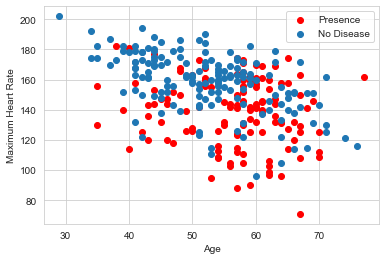

In [474]:
#scatter plot for Thalach vs. Target variable
plt.scatter(x=hd1.Age[hd1.Target==1], y=hd1.Thalach[(hd1.Target==1)], c="red")
plt.scatter(x=hd1.Age[hd1.Target==0], y=hd1.Thalach[(hd1.Target==0)])
plt.legend(["Presence", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

# Feature Selection

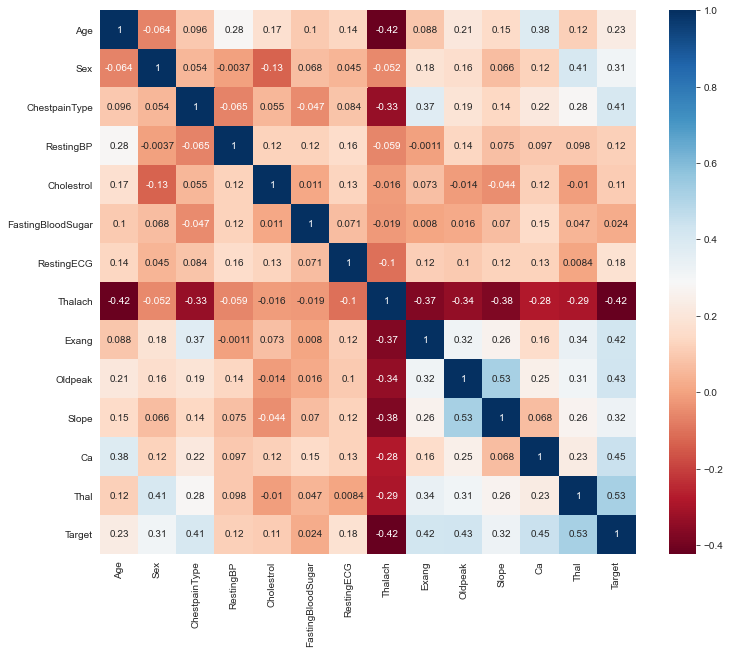

In [475]:
#Visualize the data  
plt.figure(figsize=(12,10))
#plot heat map and get correlations of each features in dataset
sns.heatmap(hd1.corr(),annot=True, cmap="RdBu")
plt.show()

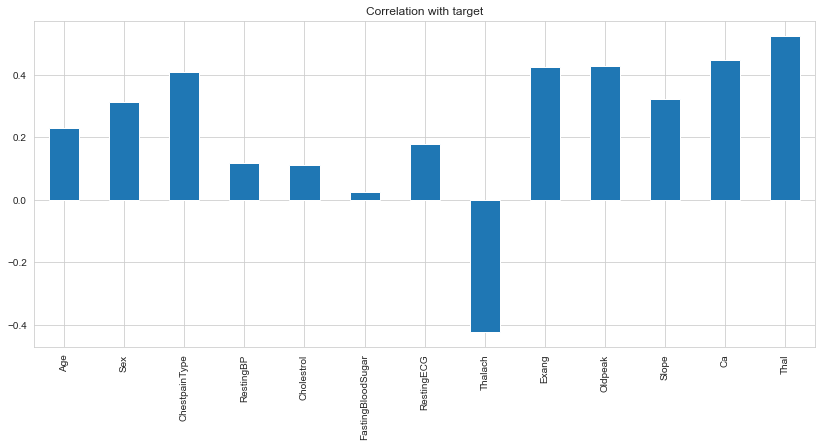

In [476]:
#Correlation with target
hd1.drop('Target', axis=1).corrwith(hd1.Target).plot(kind='bar', grid=True, figsize=(14, 6), title="Correlation with target")

In [477]:
hd2 = hd1.copy()

In [478]:
#Convert categorical variables into dummy variables
Sex_dmy = pd.get_dummies(hd2['Sex'], prefix='Sex',drop_first=True)
ChestpainType_dmy = pd.get_dummies(hd2['ChestpainType'],prefix='ChestpainType', drop_first=True)
FastingBloodSugar_dmy = pd.get_dummies(hd2['FastingBloodSugar'],prefix='FastingBloodSugar', drop_first=True)
RestECG_dmy = pd.get_dummies(hd2['RestingECG'],prefix='RestingECG', drop_first=True)
Exang_dmy = pd.get_dummies(hd2['Exang'],prefix='Exang', drop_first=True)
Slope_dmy = pd.get_dummies(hd2['Slope'],prefix='Slope', drop_first=True)
Ca_dmy = pd.get_dummies(hd2['Ca'],prefix='Ca', drop_first=True)
Thal_dmy = pd.get_dummies(hd2['Thal'],prefix='Thal', drop_first=True)

In [479]:
hd3 = pd.concat([hd2,Sex_dmy,ChestpainType_dmy,FastingBloodSugar_dmy,RestECG_dmy,Exang_dmy,Slope_dmy,Ca_dmy,Thal_dmy], axis=1)

In [480]:
hd3.head()

,Age,Sex,ChestpainType,RestingBP,Cholestrol,FastingBloodSugar,RestingECG,Thalach,Exang,Oldpeak,...,RestingECG_1,RestingECG_2,Exang_1,Slope_2,Slope_3,Ca_1,Ca_2,Ca_3,Thal_6,Thal_7
0,63,1,1,145,233,1,2,150,0,2.3,...,0,1,0,0,1,0,0,0,1,0
1,67,1,4,160,286,0,2,108,1,1.5,...,0,1,1,1,0,0,0,1,0,0
2,67,1,4,120,229,0,2,129,1,2.6,...,0,1,1,1,0,0,1,0,0,1
3,37,1,3,130,250,0,0,187,0,3.5,...,0,0,0,0,1,0,0,0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,...,0,1,0,0,0,0,0,0,0,0


In [481]:
hd4 = hd3.drop(['Sex', 'ChestpainType', 'FastingBloodSugar', 'RestingECG', 'Exang', 'Slope', 'Ca', 'Thal'],axis=1)

In [482]:
hd4.head()

,Age,RestingBP,Cholestrol,Thalach,Oldpeak,Target,Sex_1,ChestpainType_2,ChestpainType_3,ChestpainType_4,...,RestingECG_1,RestingECG_2,Exang_1,Slope_2,Slope_3,Ca_1,Ca_2,Ca_3,Thal_6,Thal_7
0,63,145,233,150,2.3,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,67,160,286,108,1.5,1,1,0,0,1,...,0,1,1,1,0,0,0,1,0,0
2,67,120,229,129,2.6,1,1,0,0,1,...,0,1,1,1,0,0,1,0,0,1
3,37,130,250,187,3.5,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,41,130,204,172,1.4,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [483]:
hd4.describe()

,Age,RestingBP,Cholestrol,Thalach,Oldpeak,Target,Sex_1,ChestpainType_2,ChestpainType_3,ChestpainType_4,...,RestingECG_1,RestingECG_2,Exang_1,Slope_2,Slope_3,Ca_1,Ca_2,Ca_3,Thal_6,Thal_7
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,...,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,54.115789,129.947368,242.515789,149.722807,0.948772,0.445614,0.698246,0.171930,0.287719,0.463158,...,0.007018,0.484211,0.315789,0.459649,0.056140,0.221053,0.122807,0.056140,0.059649,0.368421
std,9.134977,15.435031,44.652539,23.099989,1.024338,0.497908,0.459827,0.377983,0.453496,0.499518,...,0.083623,0.500630,0.465647,0.499246,0.230597,0.415686,0.328793,0.230597,0.237252,0.483225
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,211.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,239.000000,153.000000,0.600000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,140.000000,271.000000,168.000000,1.600000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,77.000000,170.000000,360.000000,202.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Preprocessing

In [484]:
#Use the StandardScaler from sklearn to scale my dataset
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

In [485]:
feature_scale = ['Age','RestingBP','Cholestrol','Thalach','Oldpeak']

In [486]:
hd4[feature_scale] = standardScaler.fit_transform(hd4[feature_scale])

In [487]:
hd4.head()

,Age,RestingBP,Cholestrol,Thalach,Oldpeak,Target,Sex_1,ChestpainType_2,ChestpainType_3,ChestpainType_4,...,RestingECG_1,RestingECG_2,Exang_1,Slope_2,Slope_3,Ca_1,Ca_2,Ca_3,Thal_6,Thal_7
0,0.974259,0.976941,-0.213482,0.012021,1.321444,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,1.412907,1.950465,0.975548,-1.809360,0.539078,1,1,0,0,1,...,0,1,1,1,0,0,0,1,0,0
2,1.412907,-0.645601,-0.303220,-0.898670,1.614831,1,1,0,0,1,...,0,1,1,1,0,0,1,0,0,1
3,-1.876950,0.003416,0.167905,1.616571,2.494993,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,-1.438302,0.003416,-0.864084,0.966077,0.441282,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [488]:
#Split our dataset into training and testing datasets
X =  hd4.drop(['Target'],axis=1)
y = hd4['Target']

In [489]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [490]:
len(X_train)

228

In [491]:
len(X_test)

57

In [492]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [513]:
#Random Forest Classifier and K-Nearest Neighbours Classifier
model_param = {
'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [20,50,80,120,150]
        }
    },
        'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'param':{
            'n_neighbors': [5,10,15,20,25]
        }
            
            
    }
}

In [514]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [515]:
df_model_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model_score

,model,best_score,best_params
0,RandomForestClassifier,0.821053,{'n_estimators': 150}
1,KNeighborsClassifier,0.785965,{'n_neighbors': 15}


In [516]:
model_rfc = RandomForestClassifier(n_estimators = 150)

In [517]:
model_rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=150)

In [518]:
model_rfc.score(X_test,y_test)

0.8947368421052632

In [519]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_rfc.predict(X_test))
cm

array([[29,  2],
       [ 4, 22]], dtype=int64)

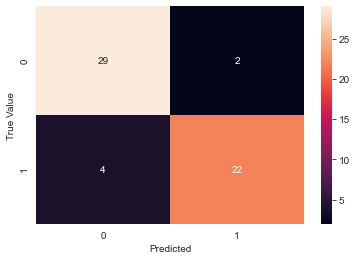

In [520]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

In [521]:
#Logical Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()


In [522]:
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
log_model = GridSearchCV(log,param_grid=params,cv=10)


In [523]:
log_model.fit(X_train,y_train)

# Printing best parameters choosen through GridSearchCV
log_model.best_params_

{'C': 10, 'class_weight': None, 'penalty': 'l2'}

In [524]:
predict = log_model.predict(X_test)

In [525]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using Logistic Regression we get an accuracy score of: ',
      round(accuracy_score(y_test,predict),5)*100,'%')

Accuracy Score:  0.8596491228070176
Using Logistic Regression we get an accuracy score of:  85.965 %


In [526]:
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88        31
           1       0.95      0.73      0.83        26

    accuracy                           0.86        57
   macro avg       0.88      0.85      0.85        57
weighted avg       0.87      0.86      0.86        57



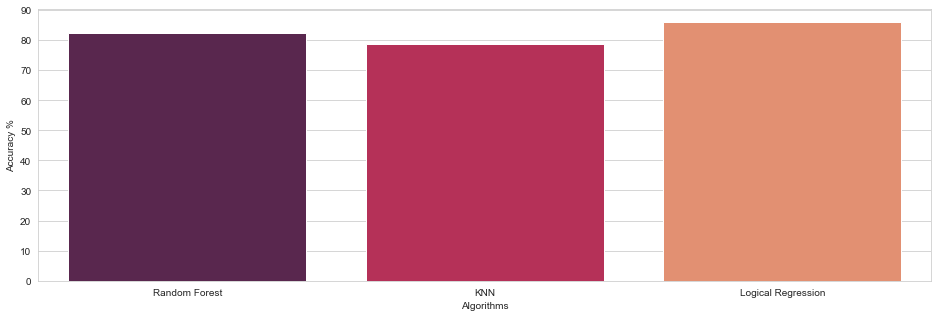

In [527]:
method = ["Random Forest" ,"KNN", "Logical Regression"]
accuracy = [82.45,78.59,85.97]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=method, y=accuracy, palette="rocket")
plt.show()